In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import sys
from sklearn.preprocessing import MinMaxScaler
ROOT_DIR = "../"
sys.path.append(ROOT_DIR)
import matplotlib.pyplot as plt
import seaborn as sns
from utils.citymeta import load_all
city_meta = load_all()
plt.rcParams["figure.figsize"] = [3, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['svg.fonttype'] = 'none'


In [2]:
# ROOT = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023"
ROOT = "D:/Dropbox (Personal)/Personal Work/_Projects2023"
TABLE_FOLDER = f"{ROOT}/01_city-never-was/_table"
# ROOT = "D:/Dropbox (Personal)/Personal Work/_Projects2023"
CURATED_FOLDER = f"{ROOT}/01_city-never-was/_data/_curated"

EXPORT_FOLDER = f"{ROOT}/01_city-never-was/_data/_curated/c_analysis"
DATA_FOLDER = f"{CURATED_FOLDER}/c_seg_hex"
N = 8
CITY_LEVEL_FILE = f"c_city_full_cluster={N}.csv"
HEX_LEVEL_FILE = f"c_hex_full_cluster={N}.csv"

city_df = pd.read_csv(os.path.join(EXPORT_FOLDER, CITY_LEVEL_FILE))
hex_df = pd.read_csv(os.path.join(EXPORT_FOLDER, HEX_LEVEL_FILE))

In [3]:

GRAPHIC_PATH = f"{ROOT}/01_city-never-was/_graphic/cluster_figure"
if not os.path.exists(GRAPHIC_PATH):
    os.makedirs(GRAPHIC_PATH)

In [24]:
target_ls = [
    'num_person_killed_per_lakh_city',
    'num_person_killed_per_lakh_country',
    'cardiovascular_diseases_cap',
    'diabetes_mellitus_cap', 
    'mental_and_substance_use_disorders_cap',
             ]
# plot barplot by each city_group
label_cols = {
    "gdp_per_cap_country_2022":"GDP Country-level",
    "num_person_killed_per_lakh_city":"No. Person Killed Per Lakh",
    "mean_flux":"CO2 Flux"
}

color_schema = {
    0:"#12939A", 
    1:"#DDB27C",
    2:"#88572C",
    3:"#FF991F",
    4:"#F15C17",
    5:"#223F9A",
    6:"#DA70BF",
    7:"#125C77"
                }

cluster_name = {
0:"openview highway connectors",
1:"high-rise & car-oriented CBD",
2:"vegetation-rich low density area",
3:"scenery open space",
4:"low-rise diverse street",
5:"low-rise vegetated living community",
6:"tunnel/bridge",
7:"multi-modal traffic CBD"
} # need to find some example images to check the results

In [ ]:
hex_df_summary = hex_df.groupby("cluster_8").size().reset_index().rename(columns = {0: "hex_count"})
hex_df_summary['cluster_name'] = hex_df_summary['cluster_8'].apply(lambda x:cluster_name[x])
hex_df_summary

,cluster_8,hex_count,cluster_name
0,0,57771,openview highway connectors
1,1,46002,high-rise & car-oriented CBD
2,2,41500,vegetation-rich low density area
3,3,40676,scenery open space
4,4,47746,low-rise diverse street
5,5,52214,low-rise vegetated living community
6,6,40002,tunnel/bridge
7,7,48690,multi-modal traffic CBD


In [24]:
hex_df['img_count_city'].sum()

31340205

In [21]:
hex_df_summary.to_csv(os.path.join(TABLE_FOLDER, "hex_cluster.csv"), index = False
                      )

In [6]:
# create ranking of target

def generate_summary(target):
    city_df[f'rank_{target}'] = city_df[target].rank(ascending=False)
    city_df[f'rank_{target}'] = city_df[f'rank_{target}'].astype(int)
    # city_df.sort_values(f'rank_{target}')[[f'rank_{target}', target, 'city_lower']]
    # create quintile of the target
    city_df[f'quintile_{target}'] = pd.qcut(city_df[target], 10, labels=False)
    city_df[f'quintile_{target}'] = city_df[f'quintile_{target}'].astype(int)
    city_df.sort_values(f'rank_{target}')[[f'quintile_{target}', target, 'city_lower']]
    clustervari = [f'cluster_{i}' for i in range(N)]
    city_df_summary = city_df[[f'quintile_{target}','city_lower']+clustervari].groupby(f'quintile_{target}')\
            .mean()
    return city_df_summary


In [29]:

cluster_column_order_num = [6,2,3,4,7,0,1,5] 
cluster_column_order = [f'cluster_{i}' for i in cluster_column_order_num]
# city_df_summary = city_df_summary[cluster_column_order]

/var/folders/hw/_9ws64g138s7p677clyddq480000gn/T/ipykernel_24076/3235095235.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


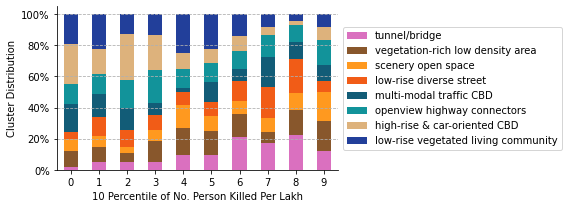

In [19]:
# plot a stacked horizontal barchart to show the distribution of cluster in each quintile
import matplotlib.pyplot as plt
import seaborn as sns

target = 'num_person_killed_per_lakh_city'
# target = 'gdp_per_cap_country_2022'
# target = 'mean_flux'
city_df_summary = generate_summary(target)

fig, ax = plt.subplots(figsize=(8,3))
city_df_summary[cluster_column_order].plot(kind='bar', 
                                  stacked=True, 
                                    color=[color_schema[i] for i in cluster_column_order_num],
                                  ax=ax)
sns.despine()
# move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           # relabel the legend
            labels=[cluster_name[i] for i in cluster_column_order_num]
           )
# y-axis label
plt.xlabel(f"10 Percentile of {label_cols[target]}")
# x-axis tick label horizontal
plt.xticks(rotation=0)
# x-axis label
# convert x-axis to percentage
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.ylabel("Cluster Distribution")

plt.grid(axis='y', linestyle='--')

plt.savefig(
    os.path.join(GRAPHIC_PATH, f"{target}_distribution.svg"),
    dpi = 200,
    
            )

In [21]:

# sel_city = np.random.choice(city_df['City'], 30)
# city_df['City'].unique()

In [30]:
# visualize several cities
sel_city = [
    'Stockholm',
     'Munich',
     'Milan',
     'Madrid',
    'Hong Kong', 
     'Singapore',
     'Tokyo',
            'London', 
           'Sydney',
            'Montereal',
            'New York',
            'Boston', 
            'Denver',
            'Santiago',
            'Buenos Aires',
            'Quito',
            'Wellington',
            
            # 'Capetown',
            'Johannesburg',
            'Delhi',
            'Bangalore',
            'Medan',
            'Lima',
            
            'Bangkok',
            'Jakarta',
            
            'Gaborone',
            'Accra',
            'Capetown',
            'Nairobi',
            'Moscow',
            'Palembang',
            'Guadalajara'
            ]
print(len(sel_city))
city_abbr_ls = [x.lower().replace(" ", "") for x in sel_city]
sel_df = city_df[city_df['City'].isin(sel_city)].reset_index(drop = True).sort_values(
    'num_person_killed_per_lakh_city')
sel_df = sel_df.set_index('City')[cluster_column_order]
# sel_df

31


/var/folders/hw/_9ws64g138s7p677clyddq480000gn/T/ipykernel_17628/2503902679.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


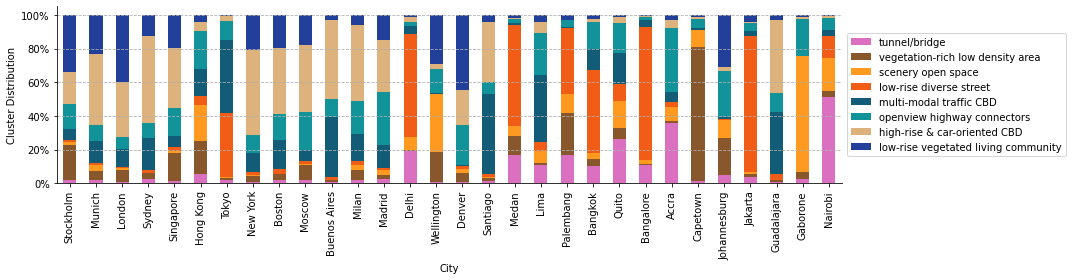

In [31]:
fig, ax = plt.subplots(figsize=(15,4))
sel_df.plot(kind='bar', 
                    stacked=True, 
                      color=[color_schema[i] for i in cluster_column_order_num],
                    ax=ax)
sns.despine()
# move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           # relabel the legend
            labels=[cluster_name[i] for i in cluster_column_order_num]
           )
# y-axis label
# plt.xlabel(f"10 Percentile of {label_cols[target]}")
# x-axis label
# convert x-axis to percentage
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
# rotate 45 degree for the x-axis
plt.xticks(rotation=90)

plt.ylabel("Cluster Distribution")
# show main grids
plt.grid(axis='y', linestyle='--')

plt.savefig(
    os.path.join(GRAPHIC_PATH, "cluster_distribution_selected_city.svg"),
    dpi = 200,
    
            )

# Fig 2. Waze

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic


In [17]:
city_df['log_waze'] = np.log(city_df['waze_accident_count'])
city_df['log_road_fatality'] = np.log(city_df['num_person_killed_per_lakh_city'])
x = 'log_waze'
y = 'log_road_fatality'
num_bins = 10
statistic = 'mean'
temp_df = city_df[[x, y]].dropna().reset_index(drop = True)
bin_means_x, bin_edges, _ = binned_statistic(temp_df[x], temp_df[x], statistic=statistic, bins=num_bins)
bin_means_y, _, _ = binned_statistic(temp_df[x], temp_df[y], statistic=statistic, bins=num_bins)
bin_std_y, _, _ = binned_statistic(temp_df[x], temp_df[y], statistic='std', bins=num_bins)
bin_count, _, _ = binned_statistic(temp_df[x], temp_df[y], statistic='count', bins=num_bins)
bin_se_y = bin_std_y/np.sqrt(bin_count)


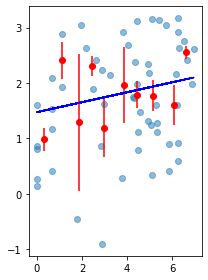

In [19]:
plt.scatter(temp_df[x], temp_df[y], alpha = 0.5)
plt.errorbar(bin_means_x, bin_means_y, yerr=bin_se_y, fmt='o', color='red', label='Binned means')
slope, intercept = np.polyfit(bin_means_x, bin_means_y, 1)
plt.plot(temp_df[x], slope * temp_df[x] + intercept, color='blue', label=f'Regression line (slope={slope:.2f})')

In [25]:
hex_df['cluster_des'] = hex_df['cluster_8'].apply(lambda x:cluster_name[x])
hex_df['log_waze'] = np.log(hex_df['waze_accident_count']+1)

In [22]:
hex_df.groupby(['cluster_8'])['waze_accident_count'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_8,,,,,,,,
0,57771.0,0.050129,0.373727,0.0,0.0,0.0,0.0,16.0
1,46002.0,0.037651,0.314736,0.0,0.0,0.0,0.0,10.0
2,41500.0,0.004747,0.092368,0.0,0.0,0.0,0.0,8.0
3,40676.0,0.001106,0.045700,0.0,0.0,0.0,0.0,5.0
4,47746.0,0.007163,0.139231,0.0,0.0,0.0,0.0,8.0
5,52214.0,0.007469,0.129903,0.0,0.0,0.0,0.0,10.0
6,40002.0,0.004000,0.144857,0.0,0.0,0.0,0.0,24.0
7,48690.0,0.050483,0.408979,0.0,0.0,0.0,0.0,19.0


C:\Users\yuanzfan\AppData\Local\Temp\ipykernel_22792\2120151876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


Text(0.5, 1.0, 'Waze Accident Count by Cluster')

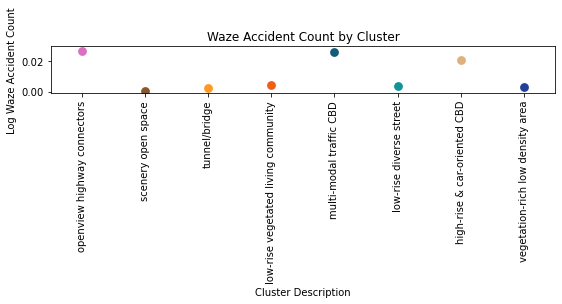

In [33]:
# sns.histplot(data = hex_df, x = 'log_waze', hue = 'cluster_des', bins = 50, kde = True)
fig, ax = plt.subplots(figsize=(8,4))
sns.pointplot(
    data = hex_df,
    x = 'cluster_des',
    y = 'log_waze',
    palette = [color_schema[i] for i in cluster_column_order_num],
    # hide the outliers
    # showfliers = False,
            )
plt.xticks(rotation=90)
plt.ylabel("Log Waze Accident Count")
plt.xlabel("Cluster Description")
plt.title("Waze Accident Count by Cluster")


In [42]:
# run negative binomial regression to see the contribution of each cluster to the accident count
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import NegativeBinomial
from statsmodels.discrete.discrete_model import Poisson

# convert the cluster to dummy variable

In [45]:
# drop the scenery open space and merge back to the hex_df
cluster_dummy = pd.get_dummies(hex_df['cluster_des'], prefix = 'cluster')
cluster_dummy = cluster_dummy.drop(columns = ['cluster_scenery open space']).reset_index()
data_df = pd.concat([hex_df, cluster_dummy], axis = 1)
data = data_df[list(cluster_dummy.columns)+['gdp_per_cap_country_2022', 'mean_flux','waze_accident_count']].dropna().reset_index(drop = True)
X = data.drop(columns = ['waze_accident_count'])
y = data['waze_accident_count']
X = sm.add_constant(X)
model = NegativeBinomial(y, X)
result = model.fit()
result.summary()

c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2909: RuntimeWarning: overflow encountered in square
  a = ((resid**2 / mu - 1) / mu).sum() / df_resid
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2649: RuntimeWarning: invalid value encountered in subtract
  coeff = (gamma_ln(size+endog) - gamma_ln(endog+1) -
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2651: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2741: RuntimeWarning: invalid value encountered in subtract
  dgpart = di

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: overflow encountered in multiply
  dldpda = -np.sum(mu*exog*(y-mu)*a1**2/(mu+a1)**2 , axis=0)
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: invalid value encountered in multiply
  dldpda = -np.sum(mu*exog*(y-mu)*a1**2/(mu+a1)**2 , axis=0)
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2871: RuntimeWarning: overflow encountered in square
  dldpda = -np.sum(mu*exog*(y-mu)*a1**2/(mu+a1)**2 , axis=0)
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2879: RuntimeWarning: divide by zero encountered in log
  np.log(prob) - (y - mu)/(a1+mu))
c:\Users\yuanzfan\Anaconda3\envs\geo38\lib\site-packages\statsmodels\discrete\discrete_model.py:2878: RuntimeWarning: invalid value encountered in add
  dalpha = da1 * (dgpar

<class 'statsmodels.iolib.summary.Summary'>
"""
                      NegativeBinomial Regression Results                      
===============================================================================
Dep. Variable:     waze_accident_count   No. Observations:               374601
Model:                NegativeBinomial   Df Residuals:                   374590
Method:                            MLE   Df Model:                           10
Date:                 Wed, 28 Aug 2024   Pseudo R-squ.:                     nan
Time:                         11:58:02   Log-Likelihood:                    nan
converged:                       False   LL-Null:                       -31469.
Covariance Type:             nonrobust   LLR p-value:                       nan
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                         -38.8193        nan        nan        nan         nan         nan
index                                           0.0010        nan        nan        nan         nan         nan
cluster_high-rise & car-oriented CBD            0.0010        nan        nan        nan         nan         nan
cluster_low-rise diverse street                 0.0010        nan        nan        nan         nan         nan
cluster_low-rise vegetated living community     0.0010        nan        nan        nan         nan         nan
cluster_multi-modal traffic CBD                 0.0010        nan        nan        nan         nan         nan
cluster_openview highway connectors             0.0010        nan        nan        nan         nan         nan
cluster_tunnel/bridge                           0.0010        nan        nan        nan         nan         nan
cluster_vegetation-rich low density area        0.0010        nan        nan        nan         nan         nan
gdp_per_cap_country_2022                        0.0010        nan        nan        nan         nan         nan
mean_flux                                       0.0010        nan        nan        nan         nan         nan
alpha                                              inf        nan        nan        nan         nan         nan
===============================================================================================================
"""